In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = 'training_data.csv'
data = pd.read_csv(file_path)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)
corrdata = data.drop(['increase_stock'], axis=1)
# Separating features and the target variable
X = data.drop(['increase_stock', 'increase_stock_binary'], axis=1)
y = data['increase_stock_binary']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
X

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0


In [5]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1595    0
1596    0
1597    0
1598    1
1599    0
Name: increase_stock_binary, Length: 1600, dtype: int64

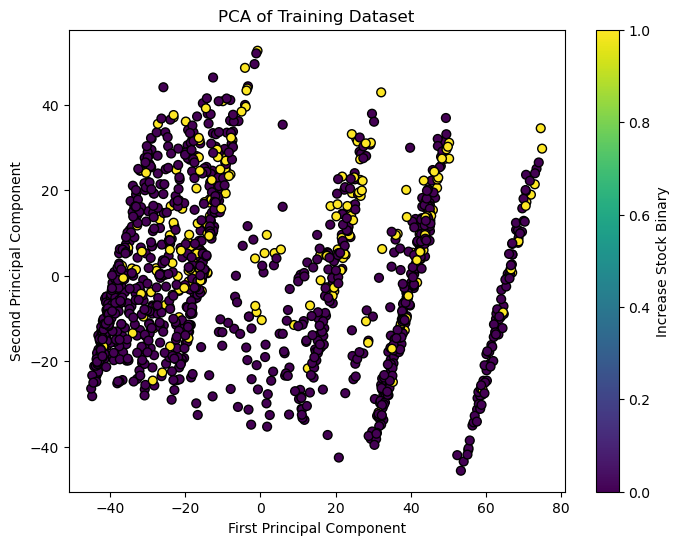

In [6]:
pca = PCA(n_components=2)  # Using 2 components for illustration purposes
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Training Dataset')
plt.colorbar(label='Increase Stock Binary')
plt.show()

Shapiro-Wilk Test for 'cloudcover':
Statistic: 0.8657134175300598, P-value: 5.876039694343224e-35



/Users/max/anaconda3/envs/deeplearning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/deeplearning/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


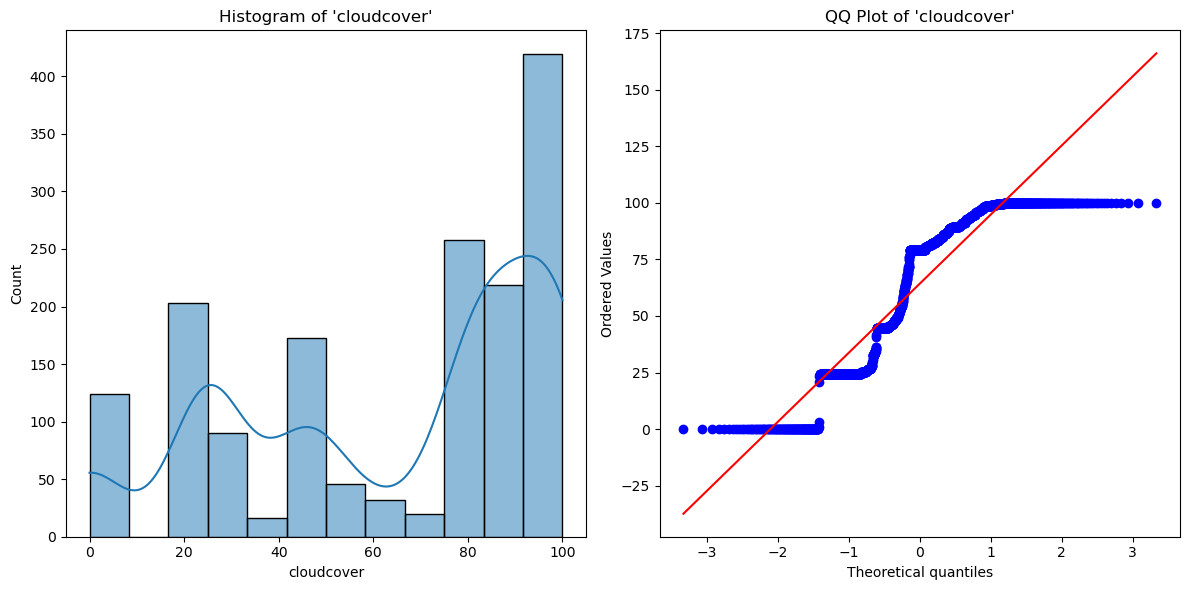

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def test_normality(data, column):
    """
    对指定的DataFrame列进行正态性检验。
    :param data: Pandas DataFrame
    :param column: 要检验的列名
    """
    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(data[column])
    print(f"Shapiro-Wilk Test for '{column}':\nStatistic: {shapiro_test[0]}, P-value: {shapiro_test[1]}\n")

    # 绘制直方图
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Histogram of '{column}'")

    # 绘制 QQ 图
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot of '{column}'")

    plt.tight_layout()
    plt.show()

# 示例：创建一个DataFrame
df = data

# 对DataFrame中的某一列进行正态性检验
test_normality(df, 'cloudcover')


In [8]:
corrdata.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock_binary
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,0


In [9]:
X

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0


In [10]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1595    0
1596    0
1597    0
1598    1
1599    0
Name: increase_stock_binary, Length: 1600, dtype: int64

In [11]:
# Calculating the correlation matrix
correlation_matrix = corrdata.corr()

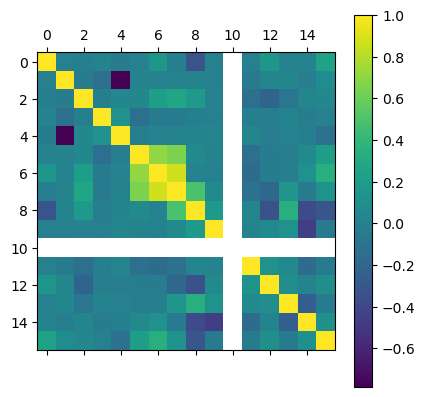

In [12]:
plt.matshow(correlation_matrix)
plt.colorbar()

In [13]:
X_corr = data[['temp','humidity','hour_of_day','summertime','dew','visibility','windspeed']]

In [14]:
y_corr = y

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.2, random_state=1)

In [16]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
pipeline = make_pipeline(StandardScaler(), knn)
# Fitting the classifier to the training data
knn.fit(X_train, y_train)

# Making predictions on the test data
y_pred = knn.predict(X_test)
# 进行交叉验证
# cv参数代表交叉验证中的折数
scores = cross_val_score(pipeline, X_test, y_test, cv=20)
# Generating a classification report and confusion matrix
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
accuracy_score_data = accuracy_score(y_test,y_pred)
# Printing the results
print("Classification Report:\n", classification_report_result)
#print("Confusion Matrix:\n", confusion_matrix_result)
print("accuracy_score:\n",accuracy_score_data)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       270
           1       0.67      0.36      0.47        50

    accuracy                           0.87       320
   macro avg       0.78      0.66      0.70       320
weighted avg       0.86      0.87      0.86       320

accuracy_score:
 0.871875
